In [1]:
import jieba 
import os
import pandas as pd
import wordcloud
import matplotlib.pyplot as plt
from imageio import imread
import numpy as np 
from PIL import Image
import re 


In [2]:

def load_data():
    """读取data,返回一个已经被jieba分好的字符串"""
    if os.path.exists("data/data.txt"):
        with open("data/data.txt","r",encoding="utf-8") as txt:
            b=txt.read()
        return b
    else:
        with open("data\Chinese-data.txt","r",encoding="utf-8") as txt:
            a=txt.read()
            a=a.replace("\n","").replace("\r","")
        b=" ".join(jieba.cut(a))
        with open("data/data.txt","w",encoding="utf-8") as f:
            f.write(b)
        return b

b=load_data()
b[:100]

'版权 信息 COPYRIGHT 书名 ： 精灵 宝 钻 作者 ： 【 英 】 托尔金 （ Tolkien ,   J . R . R . ） 出版社 ： 上海人民出版社 · 世纪 文景 出版 时间 ：'

In [3]:
## 去掉停用词，包括data/停用词.txt中的以及长度为1的词(其实就是标点符号和“的”等非常没用的词)
stoplist = list(pd.read_csv('data/停用词.txt',names=['w'],sep='\t',encoding='utf-8',engine='python').w)
blist=b.split(" ")
txt_no_stoplist=[i for i in blist if i not in stoplist and len(i)>1]
df=pd.value_counts(txt_no_stoplist)
str_no_stoplist=" ".join(txt_no_stoplist)
## 词频统计结果
df

弗罗多    2109
精灵     1794
一个     1645
甘道夫    1423
山姆     1397
       ... 
表里        1
降生        1
乃贝烈       1
动植物       1
鸡鸣        1
Length: 41576, dtype: int64

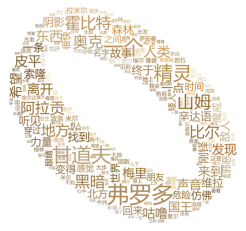

In [4]:

myfont = r'C:\Windows\Fonts\Microsoft YaHei UI\msyh' # 指定字体，默认字体不支持中文
imgobj = imread("data/ring2.png")
cloudobj = wordcloud.WordCloud(font_path=myfont,
                               mask=imgobj,
                              background_color="white",
                              stopwords=stoplist).generate(" ".join(txt_no_stoplist))

image_colors = wordcloud.ImageColorGenerator(np.array(imgobj))
cloudobj.recolor(color_func=image_colors)

plt.imshow(cloudobj)
plt.axis("off")
plt.savefig('../大作业latex/tex/figures/词云.png',dpi=400)
plt.show()
# cloudobj.to_file()

找一个自己喜欢的网络文档，进行分词后，开展如下练习。
（1）构建词袋模型，将代码贴于下方：

（2）构建2-gram模型，将代码贴于下方：

（3）构建Word2Vec模型，将代码贴于下方：


2. 分别基于上述三种模型，计算词语相似度。
找2个词语，利用三种算法，计算其最相似的前5个词语。
请比较三种算法的异同。并说明这三种算法可能应用于什么场景。


In [7]:
from gensim.models.word2vec import Word2Vec

n_dim = 300 # 指定向量维度，大样本量时300~500较好

w2vmodel = Word2Vec(vector_size = n_dim, min_count = 10) # size改为vector_size
w2vmodel.build_vocab(str_no_stoplist) # 生成词表
w2vmodel

In [8]:
%time w2vmodel.train(str_no_stoplist, \
               total_examples = w2vmodel.corpus_count, epochs = 100)

KeyboardInterrupt: 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

countvec = CountVectorizer(min_df=2) # 在两个以上文档中出现的才保留
analyze = countvec.build_analyzer()
analyze('郭靖 和 哀牢山 三十六 剑 。')

In [13]:
re.split(r"(第\w+章)","第一章 围殴覅五那妇女浓绿哦少女 第  章 ，第二章 wefwdpfsn,第十一章 ，非法物品覅我农委你 第四十五章 为我服务佛的我")

['',
 '第一章',
 ' 围殴覅五那妇女浓绿哦少女 第  章 ，',
 '第二章',
 ' wefwdpfsn,',
 '第十一章',
 ' ，非法物品覅我农委你 ',
 '第四十五章',
 ' 为我服务佛的我']

构建一个文本深度学习模型，开展自动写作任务（如写歌词、小说、诗歌等）

在下面提供你的写作结果。如果训练次数翻一倍，写作结果会有什么样的变化，更好还是更差？请实践并说明原因。